<a href="https://colab.research.google.com/github/PrateekKumar88888/EDA-on-Play-Store-App-Data/blob/main/Prateek_Kumar_EDA_Capston_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib
import matplotlib.ticker as ticker


In [2]:
# code to remove warning at top of the plot
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
images_dir='/content/drive/MyDrive/EDA Capston Project'

In [3]:
# mount the drive where files is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
review='/content/drive/MyDrive/Colab Notebooks/Copy of User Reviews.csv'
app='/content/drive/MyDrive/Colab Notebooks/Copy of Play Store Data.csv'
review_df=pd.read_csv(review)
app_df=pd.read_csv(app)


In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
# Before cleaning
app=app_df.shape
review=review_df.shape
data_shape_dict={'app_dataset':app,'reviews_dataset':review}
pd.DataFrame(data_shape_dict,index=['rows','columns'])

,app_dataset,reviews_dataset
rows,10841,64295
columns,13,5


#<b> Data Cleaning

## <b> App data 

In [9]:
# Null values in each columns in app dataframe
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### <b>`Droping duplicate rows`






In [10]:
# Number of duplicated rows.
# df.duplicated().sum() function counts no of duplicate rows in a dataframe.
app_df.duplicated().sum()

483

In [11]:
# Now, removing duplicate rows
app_df.drop_duplicates(inplace=True)
app_df.duplicated().sum()

0

In [12]:
# Each app should have single entry in app dataframe because it contains information about a particular app,such as Rating, Reviews, Size, Installs etc
app_df.App.value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [13]:
# We observe that same app has many entries and only slight differences is in their Reviews.
app_df[app_df['App']=='Zombie Catchers']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1693,Zombie Catchers,GAME,4.7,990491,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1727,Zombie Catchers,GAME,4.7,990586,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1898,Zombie Catchers,GAME,4.7,990723,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1924,Zombie Catchers,GAME,4.7,990663,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1982,Zombie Catchers,GAME,4.7,990796,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
4244,Zombie Catchers,GAME,4.7,989158,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up


* same app is in two categories and has only difference in Reviews. Now , we need to group by App and Category and aggregated on reviews.

In [20]:
app_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

### <b>`Rating`

In [14]:
app_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [15]:
# Now, we need to replace outlier 19. and nan with average ratings.
app_df['Rating'].replace(np.nan, round(app_df['Rating'].mean(),1),inplace=True)
app_df['Rating'].replace(19.,round(app_df['Rating'].mean(),1),inplace=True)

Text(0, 0.5, 'Ratting')

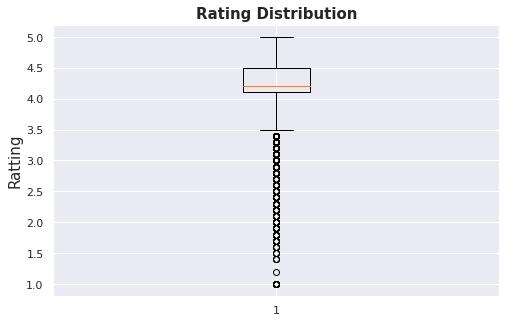

In [16]:
# Box Plot
fig = plt.figure(figsize =(8, 5))
ratting_list=list(app_df.Rating.unique())
plt.boxplot(app_df.Rating)
plt.title('Rating Distribution',size=15,fontweight='bold')
plt.ylabel('Ratting',size=15)

###<b> `Reviews`

In [17]:
# reviews data contains some values in  Million format such as 200M,100M,etc so we need to convert it in numeric by using ( 1M =1000000)
app_df['Reviews']=pd.to_numeric(app_df['Reviews'],errors='coerce')

### <b> `Size`

In [18]:
app_df['Size'].unique()[:10]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M'], dtype=object)

In [19]:
# '1,000+' is a value in one row of column 'Size', remove this row from df_1

x=app_df[app_df['Size']=='1,000+'].index
app_df.drop(axis=0, inplace=True, index=x)

In [20]:
# replace 'Varies with device' value with 0 , we will replace these values with mean value.
# create list of all values of column 'Size'
# clean_size_data() is a user define function, it will convert all values (like-'M','k') in one unit 'M'


app_df['Size']=app_df['Size'].replace('Varies with device',0.0)

app_df['Size']=app_df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else str(x))
app_df['Size']=app_df['Size'].apply(lambda x: str(x).replace('k','') if 'k' in str(x) else str(x))
app_df['Size']=app_df['Size'].apply(lambda x: float(x))


In [21]:
# Replacing the 0.0 value with mean values
app_df['Size']=app_df['Size'].replace(0.0,app_df['Size'].mean())

### <b> `Installs`

In [22]:
app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
# data cleaning of Installs column

app_df['Installs']=app_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
app_df['Installs']=app_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
app_df['Installs']=app_df['Installs'].apply(lambda x: float(x))

### <b> `'Type', 'Current Ver' and 'Android Ver'`

In [24]:
# mode of categorical values
print(app_df['Type'].mode())
print(app_df['Current Ver'].mode())
print(app_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [25]:
# Fill the missing categorical values with modes

app_df['Type'].fillna(str(app_df['Type'].mode().values[0]),inplace=True)
app_df['Current Ver'].fillna(str(app_df['Current Ver'].mode().values[0]),inplace=True)
app_df['Android Ver'].fillna(str(app_df['Android Ver'].mode().values[0]),inplace=True)

### <b> `Price`

In [26]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
# data cleaning of 'price' column

app_df['Price']=app_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
app_df['Price']=app_df['Price'].apply(lambda x: float(x))

### <b> `Content Rating`

In [28]:
app_df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### <b> `Last Updated`

In [29]:
app_df['Last Updated']=pd.to_datetime(app_df['Last Updated'])

In [30]:
app_df['updated_year']=app_df['Last Updated'].dt.year

In [31]:
app_df.head()
app_df['updated_year'].value_counts().sort_index()

2010       1
2011      15
2012      26
2013     108
2014     204
2015     454
2016     789
2017    1826
2018    6934
Name: updated_year, dtype: int64

Text(0.5, 1.0, 'Last update year')

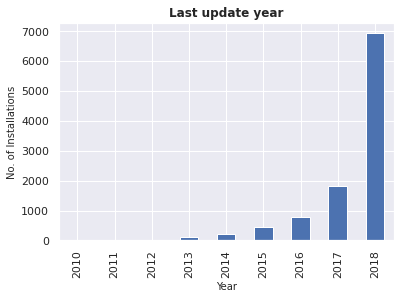

In [32]:
app_df['updated_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year',size=10)
plt.ylabel('No. of Installations',size=10)
plt.title('Last update year',size=12,fontweight='bold')

In [33]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  float64       
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
 13  updated_year    10357 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)


## <b> Review dataset

In [34]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [35]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [36]:
review_df[review_df['Sentiment'].isnull() & review_df['Translated_Review'].isnull() & review_df['Sentiment_Polarity'].isnull() & review_df['Sentiment_Subjectivity'].isnull()  ]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [37]:
review_df=review_df.drop(review_df[(review_df['Translated_Review'].isnull()) & (review_df['Sentiment'].isnull())& 
                         (review_df['Translated_Review'].isnull())& (review_df['Sentiment_Subjectivity'].isnull())].index)
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [38]:
26863+37432 

64295

In [39]:
review_df=review_df[~review_df['Translated_Review'].isnull()]
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [40]:
review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [41]:
review_df.Sentiment_Polarity.describe()

count    37427.000000
mean         0.182171
std          0.351318
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

* Cleaning column 'App'

In [42]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [43]:
review_df.duplicated().sum()

7735